In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import VotingRegressor

#for visualization of initial dataset
cy = pd.read_csv('pk_crop_yield.csv')
cy.head()
#cy.pivot_table(values="value", index="year", columns="crop").plot(figsize=(9,7))

,crop,year,value,crop_val
0,"Almonds, with shell",1991,42903,0
1,"Almonds, with shell",1992,44421,0
2,"Almonds, with shell",1993,44066,0
3,"Almonds, with shell",1994,44056,0
4,"Almonds, with shell",1995,47477,0


In [2]:
cy_train = pd.read_csv('pk_crop_yield_train.csv')
cy_train.head()

,crop,year,value,crop_val
0,Dates,2008,62448,18
1,Sesame seed,2010,3997,57
2,"Tobacco, unmanufactured",1995,17056,67
3,"Groundnuts, with shell",2009,6087,26
4,"Pumpkins, squash and gourds",2011,99247,51


      Actual-Yield  Predicted-Yield
0            62448     62466.559835
1             3997     56438.037797
2            17056     68656.953067
3             6087     44301.982147
4            99247     83097.836639
...            ...              ...
1465         77222     70973.244970
1466         47453     68275.582164
1467         99869     79811.288366
1468         88732     75554.052681
1469         67206     73242.169682

[1470 rows x 2 columns]


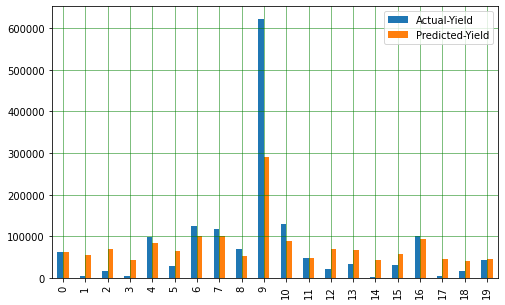

In [3]:
cy_output = cy_train['value']
cy_input = cy_train[['crop_val','year']]

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg4 = ElasticNet(random_state=1)
reg5 = Lasso(random_state=1)
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3), ('el', reg4), ('la', reg5)])
ereg = ereg.fit(cy_input, cy_output)


cy_predict = ereg.predict(cy_input)
df = pd.DataFrame({'Actual-Yield': cy_output, 'Predicted-Yield': cy_predict})
print(df)

df1 = df.head(20)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

     Actual-Yield  Predicted-Yield
0           85318     74739.120698
1            5403     38336.536983
2            4008     56495.884441
3          141429     94400.096386
4          132235     84721.732251
..            ...              ...
625        102488     98376.249861
626        109455     98645.656487
627         35966     66249.583575
628          9976     44801.072112
629          8149     49138.925359

[630 rows x 2 columns]


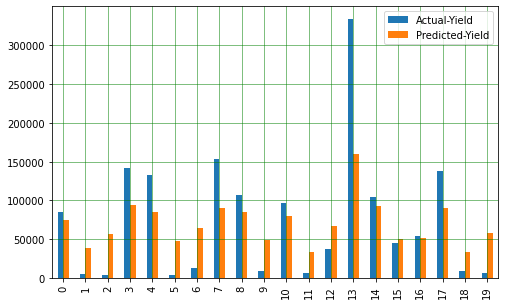

In [4]:
cy_test = pd.read_csv('pk_crop_yield_test.csv')
cy_output_test = cy_test['value']
cy_input_test = cy_test[['crop_val','year']]

cy_output_test_predict = ereg.predict(cy_input_test)
df = pd.DataFrame({'Actual-Yield': cy_output_test, 'Predicted-Yield': cy_output_test_predict})
print(df)

df1 = df.head(20)
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [5]:
user_input_crop = 4
user_input_year = 2021 
test_user_predict = ereg.predict([[user_input_crop, user_input_year]]) 
print (test_user_predict)

[33700.17618487]


In [6]:
pd.to_pickle(ereg,r'..\crop_yield_model.pickle')